<a href="https://colab.research.google.com/github/CHRISTIANDAGATTI/AEyCD---Grupo-9/blob/main/Entregable_parte_1_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
!pip install sqlalchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install decouple

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for decouple: filename=decouple-0.0.7-py3-none-any.whl size=4483 sha256=0b6cb9fc06238c64f0e609bc5818fe7778dcea0161fd22b35452bc777e2daff6
  Stored in directory: /root/.cache/pip/wheels/c0/f8/ba/513f9e16fec0df6b2dfd693ae2c057773e912c478b6019f24f
Successfully built decouple


In [3]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install config

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn as sns
sns.set_context('talk')


import config
from sqlalchemy import create_engine, text

In [7]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

In [8]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



**1- Creación de base de datos:**

In [9]:
engine = create_engine('sqlite:///sysarmy.sqlite3', echo=True)

**2- Creación de tablas:**

In [10]:
melb_df.to_sql('Melbo', con=engine, if_exists="replace")

2022-05-31 02:16:16,141 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Melbo")
2022-05-31 02:16:16,143 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-31 02:16:16,145 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Melbo")
2022-05-31 02:16:16,148 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-31 02:16:16,159 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-31 02:16:16,168 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Melbo" (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)


2022-05-31 02:16:16,182 INFO sqlalchemy.engine.Engine [no key 0.01434s] ()
2022-05-31 02:16:16,240 INFO sqlalchemy.engi

In [11]:
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
airbnb_df.head(3)

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0


In [13]:
airbnb_df.to_sql('Airbnb', con=engine, if_exists="replace")

2022-05-31 02:16:29,676 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Airbnb")
2022-05-31 02:16:29,680 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-31 02:16:29,684 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Airbnb")
2022-05-31 02:16:29,687 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-31 02:16:29,693 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-31 02:16:29,713 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Airbnb" (
	"index" BIGINT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)


2022-05-31 02:16:29,717 INFO sqlalchemy.engine.Engine [no key 0.00355s] ()
2022-05-31 02:16:29,736 INFO sqlalchemy.engine.Engine CREATE INDEX "ix_Airbnb_index" ON "Airbnb" ("index")
2022-05-31 02:16:29,740 INFO sqlalchemy.engine.Engine [no key 0.00340s] ()
2022-05-31 02:16:29,756

**A traves de "to_numeric" llevamos todos los registros al mismo tipo de datos**

In [14]:
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')

In [15]:
airbnb_df.zipcode.value_counts().head(10)

3000.0    3367
3006.0    1268
3182.0    1135
3141.0     881
3004.0     728
3121.0     628
3008.0     616
3053.0     538
3181.0     460
3056.0     446
Name: zipcode, dtype: int64

In [16]:
airbnb_df.head(3)

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105.0,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057.0,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182.0,-37.859755,144.977369,159,1253.0,4452.0


**3. Consultas SQL:**

**Cantidad de registros totales por ciudad:**


(Guardamos strings en variables y luego pandas lo convierte en una sentencia sql)

In [17]:
query1 = "SELECT city, COUNT(*) FROM Airbnb GROUP BY city ORDER BY COUNT(city) desc"
query2 = "SELECT city, neighborhood, COUNT(city) FROM Airbnb GROUP BY city, neighborhood  ORDER BY city"

In [18]:
with engine.connect() as con:
      rs = con.execute(query1)
      print(query1)
      for row in rs:
          print(row)

2022-05-31 02:16:32,496 INFO sqlalchemy.engine.Engine SELECT city, COUNT(*) FROM Airbnb GROUP BY city ORDER BY COUNT(city) desc
2022-05-31 02:16:32,508 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT city, COUNT(*) FROM Airbnb GROUP BY city ORDER BY COUNT(city) desc
('Melbourne', 7368)
('Port Phillip', 2808)
('Yarra', 2049)
('Stonnington', 1621)
('Moreland', 967)
('Yarra Ranges', 771)
('Darebin', 698)
('Boroondara', 664)
('Glen Eira', 631)
('Whitehorse', 614)
('Monash', 571)
('Maribyrnong', 436)
('Wyndham', 426)
('Bayside', 375)
('Moonee Valley', 344)
('Manningham', 313)
('Kingston', 309)
('Hobsons Bay', 239)
('Banyule', 203)
('Frankston', 177)
('Knox', 175)
('Hume', 170)
('Casey', 153)
('Greater Dandenong', 147)
('Whittlesea', 137)
('Cardinia', 123)
('Maroondah', 115)
('Brimbank', 108)
('Melton', 95)
('Nillumbik', 88)


In [19]:

with engine.connect() as con:
      rs = con.execute(query2)
      print(query2)
      for row in rs:
          print(row)

2022-05-31 02:16:32,637 INFO sqlalchemy.engine.Engine SELECT city, neighborhood, COUNT(city) FROM Airbnb GROUP BY city, neighborhood  ORDER BY city
2022-05-31 02:16:32,644 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT city, neighborhood, COUNT(city) FROM Airbnb GROUP BY city, neighborhood  ORDER BY city
('Banyule', None, 174)
('Banyule', 'Alphington', 16)
('Banyule', 'Preston', 8)
('Banyule', 'Thornbury', 5)
('Bayside', None, 170)
('Bayside', 'Bentleigh', 1)
('Bayside', 'Brighton', 203)
('Bayside', 'Elwood', 1)
('Boroondara', None, 30)
('Boroondara', 'Ashburton', 14)
('Boroondara', 'Balwyn', 70)
('Boroondara', 'Balwyn North', 40)
('Boroondara', 'Camberwell', 82)
('Boroondara', 'Canterbury', 24)
('Boroondara', 'Glen Iris', 32)
('Boroondara', 'Hawthorn', 261)
('Boroondara', 'Kew', 109)
('Boroondara', 'Malvern', 2)
('Brimbank', None, 108)
('Cardinia', None, 123)
('Casey', None, 153)
('Darebin', None, 112)
('Darebin', 'Alphington', 22)
('Darebin', 'Coburg', 4)
('Darebin', 'Northcote', 

**Cantidad de registros totales por barrio y ciudad:**

**4.JOIN de Datasets por SQL:**

Controlamos de que tengamos suficientes registros en común como para agregar información relevante a traves del JOIN por Código Postal.

In [20]:
intersection = numpy.intersect1d(
    airbnb_df.zipcode.values, melb_df.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("Sales unique zipcodes", len(melb_df.Postcode.unique()))
print("Common zipcodes", len(intersection))

Airbnb unique zipcodes 248
Sales unique zipcodes 198
Common zipcodes 191


Calculamos el porcentaje de el total de registros de Postcode o Zipcode que interaccionan (cruzan) entre los distintos Dataset respecto el total de registros.

In [21]:
print('Records in Sales df with corresponding zipcode form Airbnb df',
      melb_df.Postcode.isin(intersection).sum() / len(melb_df))
print('Records in Airbnb df with corresponding zipcode form Sales df',
      airbnb_df.zipcode.isin(intersection).sum() / len(airbnb_df))

Records in Sales df with corresponding zipcode form Airbnb df 0.9985272459499264
Records in Airbnb df with corresponding zipcode form Sales df 0.9302904564315353


Definimos columnas de interes del Dataset de Airbnb y calculamos ciertas métricas de los registros agrupados por Zipcode.

In [22]:
relevant_cols = ['zipcode','neighborhood', 'price', 'weekly_price', 'monthly_price']
## Option 1
# Pass a dictionary where the keys are the original columns to aggregate and
# the values are the operations (or list of operations).
airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
  .agg({'price': ['min','median', 'mean', "max"], 'weekly_price': ['min','median', 'mean', "max"],
        'monthly_price': ['min','median', 'mean', "max"], "zipcode": "count"})\
  .reset_index()
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price min': "airbnb_price_min",
             'price median': 'airbnb_price_median',
             'price mean': 'airbnb_price_mean',
             'price max':'airbnb_price_max',
             'weekly_price min': 'airbnb_weekly_price_min',
             'weekly_price median': 'airbnb_weekly_price_median',
             'weekly_price mean': 'airbnb_weekly_price_mean',
             'weekly_price max': 'airbnb_weekly_price_max',
             'monthly_price min': 'airbnb_monthly_price_min',
             'monthly_price median': 'airbnb_monthly_price_median',
             'monthly_price mean': 'airbnb_monthly_price_mean',
             'monthly_price max': 'airbnb_monthly_price_max',
             'zipcode count': 'airbnb_zipcode_count',
             'neighborhood': 'airbnb_neighborhood'
                }
)
airbnb_price_by_zipcode[:5]

,zipcode,airbnb_price_min,airbnb_price_median,airbnb_price_mean,airbnb_price_max,airbnb_weekly_price_min,airbnb_weekly_price_median,airbnb_weekly_price_mean,airbnb_weekly_price_max,airbnb_monthly_price_min,airbnb_monthly_price_median,airbnb_monthly_price_mean,airbnb_monthly_price_max,airbnb_zipcode_count
0,2010.0,40,40.0,40.000000,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2134.0,50,50.0,50.000000,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2582.0,104,104.0,104.000000,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3000.0,0,129.0,150.504307,9000,150.0,857.0,918.738956,3325.0,550.0,3469.0,3407.204651,8060.0,3367
4,3001.0,120,132.5,132.500000,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [23]:
airbnb_price_by_zipcode.head()

,zipcode,airbnb_price_min,airbnb_price_median,airbnb_price_mean,airbnb_price_max,airbnb_weekly_price_min,airbnb_weekly_price_median,airbnb_weekly_price_mean,airbnb_weekly_price_max,airbnb_monthly_price_min,airbnb_monthly_price_median,airbnb_monthly_price_mean,airbnb_monthly_price_max,airbnb_zipcode_count
0,2010.0,40,40.0,40.000000,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2134.0,50,50.0,50.000000,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2582.0,104,104.0,104.000000,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3000.0,0,129.0,150.504307,9000,150.0,857.0,918.738956,3325.0,550.0,3469.0,3407.204651,8060.0,3367
4,3001.0,120,132.5,132.500000,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [24]:
airbnb_price_by_zipcode.to_sql('Metrica', con=engine, if_exists="replace")

2022-05-31 02:16:33,249 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Metrica")
2022-05-31 02:16:33,250 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-31 02:16:33,253 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Metrica")
2022-05-31 02:16:33,255 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-31 02:16:33,262 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-31 02:16:33,268 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Metrica" (
	"index" BIGINT, 
	zipcode FLOAT, 
	airbnb_price_min BIGINT, 
	airbnb_price_median FLOAT, 
	airbnb_price_mean FLOAT, 
	airbnb_price_max BIGINT, 
	airbnb_weekly_price_min FLOAT, 
	airbnb_weekly_price_median FLOAT, 
	airbnb_weekly_price_mean FLOAT, 
	airbnb_weekly_price_max FLOAT, 
	airbnb_monthly_price_min FLOAT, 
	airbnb_monthly_price_median FLOAT, 
	airbnb_monthly_price_mean FLOAT, 
	airbnb_monthly_price_max FLOAT, 
	airbnb_zipcode_count BIGINT
)


2022-05-31 02:16:33,270 INFO sqlalchemy.engine.Engine [no key 0.00178s] ()
2022-05-31

Generamos y ejecutamos la sentencia de SQL para unir mediante LEFT JOIN las tablas "Melbo" y "Métricas" (generada a partir del Dataset de Airbnb.

Primeramente ejecutamos un conteo de registros del Leftjoin (Desde tabla Melbo) para comparar y controlar la cantidad de registros de la tabla resultante:

In [25]:
query3 = "SELECT COUNT() FROM Melbo LEFT JOIN Metrica ON Metrica.zipcode=Melbo.Postcode"

In [26]:
with engine.connect() as con:
      rs = con.execute(query3)
      print(query3)
      for row in rs:
          print(row)

2022-05-31 02:16:33,419 INFO sqlalchemy.engine.Engine SELECT COUNT() FROM Melbo LEFT JOIN Metrica ON Metrica.zipcode=Melbo.Postcode
2022-05-31 02:16:33,421 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT COUNT() FROM Melbo LEFT JOIN Metrica ON Metrica.zipcode=Melbo.Postcode
(13580,)


In [27]:
len(melb_df)

13580

In [28]:
query4 = "SELECT * FROM Melbo LEFT JOIN Metrica ON Metrica.zipcode=Melbo.Postcode"

In [29]:
# with engine.connect() as con:
#     rs = con.execute(query4)
#     print(query4)
#     for row in rs:
#        print(row)

## **Ejercicio 2:** 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

#**1. Selección del subconjunto de variables relevantes:**

 **Descripción de variables:**

- Suburb: region 

- Address: property address 

- Rooms: Number of rooms

- Price: Price in dollars

- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

- SellerG: Real Estate Agent

- Date: Date sold

- Distance: Distance from CBD

- Regionname: General Region (West, North West, North, North east …etc)

- Propertycount: Number of properties that exist in the suburb.

- Bedroom2 : Scraped # of Bedrooms (from different source)

- Bathroom: Number of Bathrooms

- Car: Number of carspots

- Landsize: Land Size

- BuildingArea: Building Size

- YearBuilt: Years of construction

- CouncilArea: Governing council for the area


**Descartamos las siguientes variables, incluso antes de continuar su analisis,  por no considerarlas relevantes al problema planteado :**

- Regionname
- Propertycount
- Address
- Postcode
- Lattitude
- Longtitude
- CouncilArea


In [30]:
#Analisis de los tipos de variables del Dataset y visualización de valores faltantes
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

- Se advierte que las variables "BuildingArea" y "YearBuilt" tienen muchos campos con valores Nulos, pero no nos anticiparemos a descartar estas variables de nuestro analisis porque entendemos que es información muy importante para nuestro objetivo.

In [31]:
#Analizamos la existencia de ceros en nuestras variables:
cols = melb_df[melb_df == 0].count(axis=0)
cols[cols > 0]

Distance           6
Bedroom2          16
Bathroom          34
Car             1026
Landsize        1939
BuildingArea      17
dtype: int64

- Como se puede ver hay valores que se consideran como un error de carga ya que:

  - Bathroom no deberia ser cero en ningun caso ya que una casa debe tener aunque sea un baño;

  - Landzise no puede tomar valor 0 ya que es el tamaño del terreno;
  
  - Superficie construida no puede tener valor 0 ya que se trata del tamaño de la construcción.

In [32]:
pandas.options.display.float_format = '{:.2f}'.format

In [33]:
melb_df.describe()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,3105.30,2.91,1.53,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,90.68,0.97,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,3044.00,2.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3084.00,3.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3148.00,3.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,3977.00,20.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00


**Price**

<Figure size 1440x720 with 0 Axes>

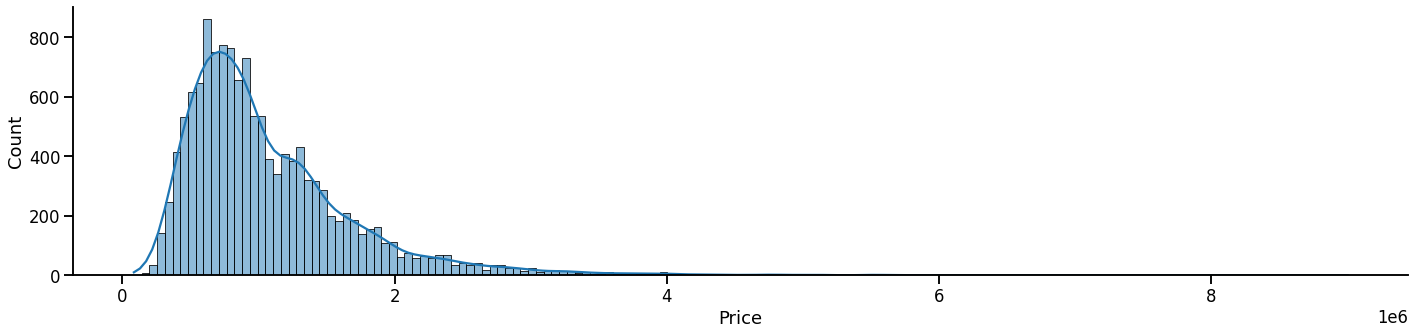

In [34]:
#Distribución del precio de las propiedades en el Dataset
plt.figure(figsize=(20, 10))
sns.displot(melb_df['Price'], aspect=4, kde=True)

  - Observamos la existencia de valores extremos hacia la derecha de la curva de distribución del precio de las propiedades.

**Suburb**

In [35]:
#Conteo de frecuencias de Suburb en el Dataframe
Suburb_df = (pandas.value_counts(melb_df['Suburb'])).reset_index().rename(columns={'index': 'Suburb', 'Suburb': 'frequency'})
print(Suburb_df)
Conteo = len(melb_df['Suburb'])
print('Total de registros para Suburb:', Conteo)

             Suburb  frequency
0         Reservoir        359
1          Richmond        260
2    Bentleigh East        249
3           Preston        239
4         Brunswick        222
..              ...        ...
309       Sandhurst          1
310    Bullengarook          1
311   Croydon South          1
312        Montrose          1
313         Monbulk          1

[314 rows x 2 columns]
Total de registros para Suburb: 13580


In [36]:
# Si consideramos relevante la variable Suburbios, podemos filtrar el Dataframe por los que tengan frecuencia mayor a 30 y tener muestras representativas por Suburb
Suburb_list = Suburb_df[Suburb_df['frequency']>30].set_index("Suburb").index.to_numpy().tolist()
Suburb_df2 = melb_df[melb_df.Suburb.isin(Suburb_list)]
Suburb_df2.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00


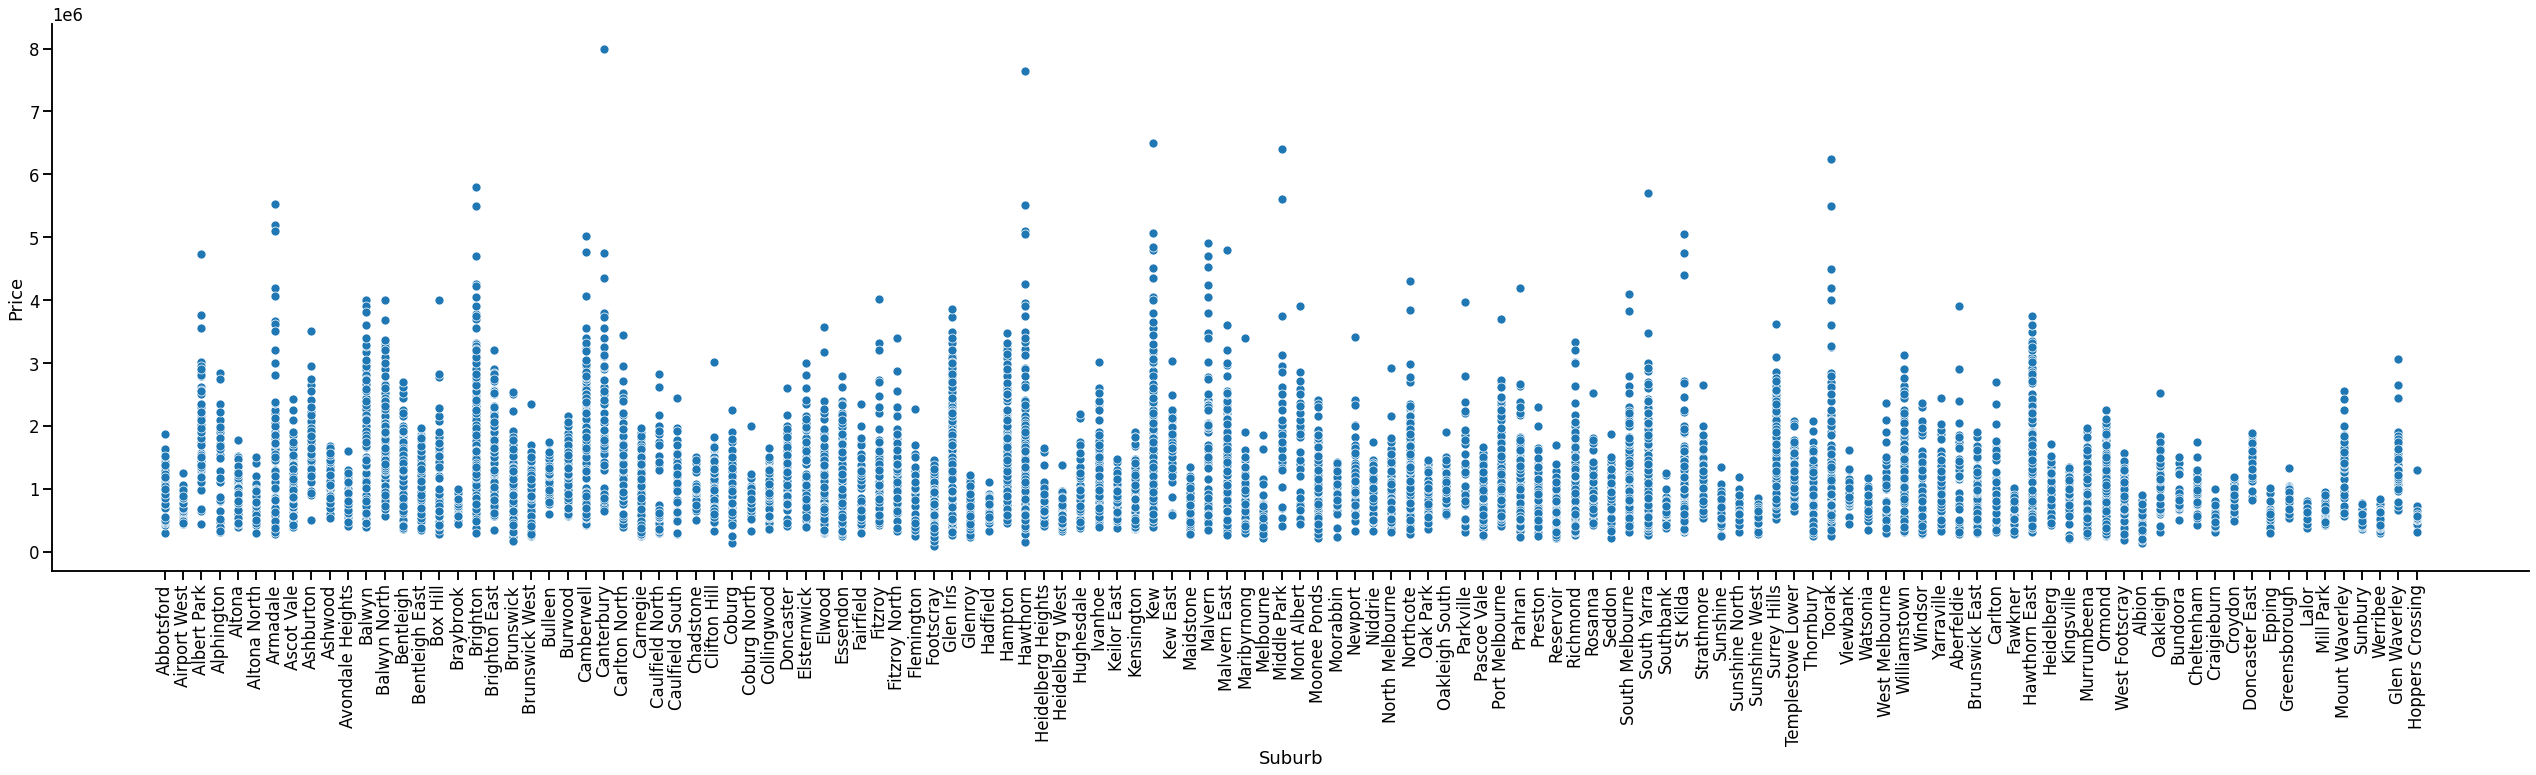

In [37]:
#Relación Precio - Suburbios
grid = sns.pairplot(data=Suburb_df2, y_vars=['Price'],
                 x_vars=['Suburb'],
                 aspect=4, height=9)
for ax in grid.axes.flat[:2]:
    ax.tick_params(axis='x', labelrotation=90)

  - Como es de esperar, podemos observar que existen "Suburb" con precios de propiedades bajos y otros con precios muy altos.

**Type**

In [38]:
print(pandas.value_counts(melb_df['Type']))
Conteo = len(melb_df['Type'])
print('Total de registros para Type:', Conteo)

h    9449
u    3017
t    1114
Name: Type, dtype: int64
Total de registros para Type: 13580


  - En gran medida el tipo de propiedades del dataset corresponde a la categoría Casa, lo cual indicaría que tenemos pocos registros de otros tipos de propiedades, hecha esta salvedad decidimos incluir la variable en nuestro analisis.

**Rooms**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


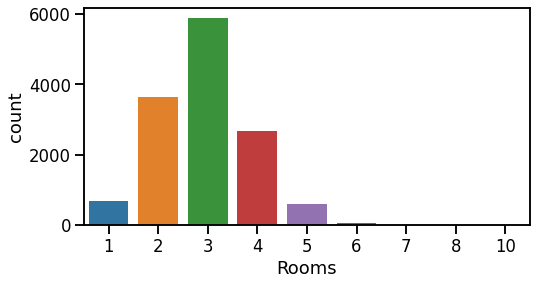

In [39]:
fig = plt.figure(figsize=(8,4))
sns.countplot(melb_df.Rooms)
plt.xticks(rotation=0)
plt.show()

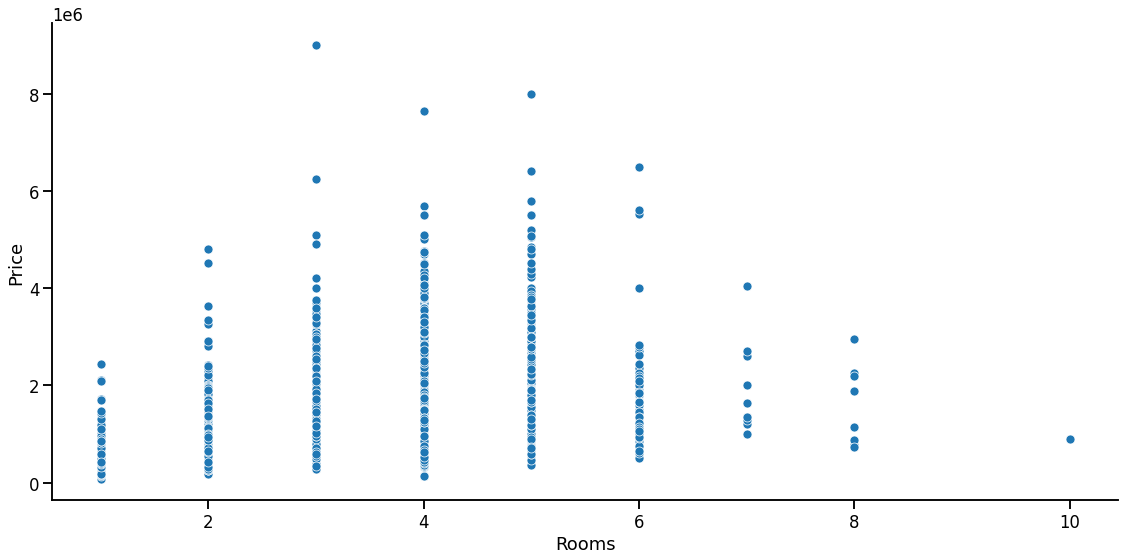

In [40]:
#Relación Precio - Habitaciones
sns.pairplot(data=melb_df, y_vars=['Price'],
                 x_vars=['Rooms'],
                 aspect=2, height=8)

  - Se observa que a medida que el número de habitaciones es mayor el precio de las propiedades incrementa, aunque deberiamos a su vez poner atención en las propiedades de mas de 6 o 7 habitaciones porque parecen no seguir este patron.

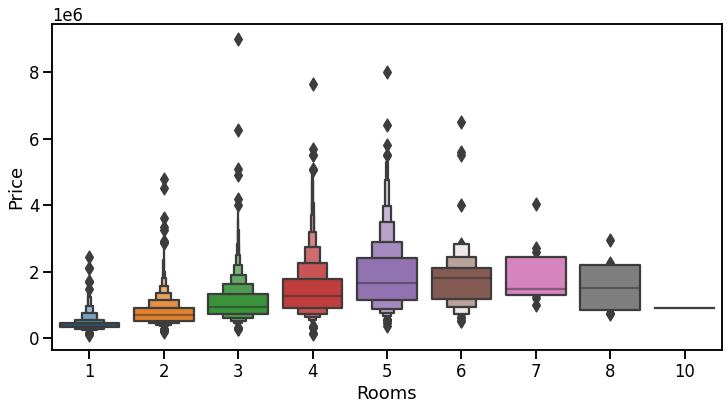

In [41]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=melb_df, x='Rooms', y='Price')

**Bedrooms**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


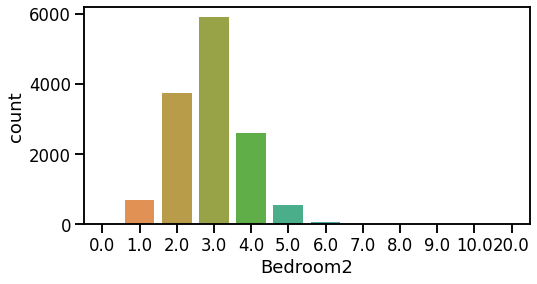

In [42]:
fig = plt.figure(figsize=(8,4))
sns.countplot(melb_df.Bedroom2)
plt.xticks(rotation=0)
plt.show()

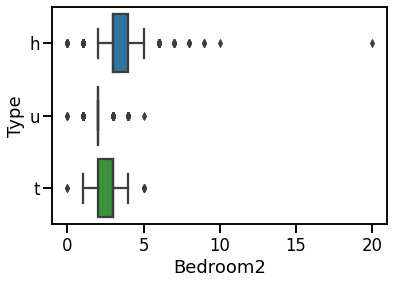

In [43]:
#Baños según tipo de vivienda
sns.boxplot(data=melb_df, x='Bedroom2', y='Type')

In [44]:
#Tabla de contingencia para Rooms y Bedrooms
Bedroom2 = melb_df.Bedroom2
Rooms = melb_df.Rooms
pandas.crosstab(Bedroom2,Rooms)

Rooms,1,2,3,4,5,6,7,8,10
Bedroom2,,,,,,,,,
0.00,0,5,8,3,0,0,0,0,0
1.00,663,21,5,2,0,0,0,0,0
2.00,16,3539,162,19,1,0,0,0,0
3.00,2,74,5626,175,18,1,0,0,0
4.00,0,8,73,2473,42,4,0,1,0
5.00,0,1,5,15,531,2,2,0,0
6.00,0,0,0,0,2,59,0,2,0
7.00,0,0,0,0,1,1,8,0,0
8.00,0,0,0,0,1,0,0,4,0


- Recordemos que solo había 16 casos con valores cero para la variable Bedroom2. Y hay unit, houses y townhouses sin dormitorios. Se puede pensar que hay unidades de estilo de moderno monoambiente, donde conviven la cocina y el dormitorio. Es dificil pensar que hay casa sin dormitorios. Ese parece ser un dato faltante, pues Bedroom2 es un dato obtenido mediante la union con otra database.

  Por ende entendemos que la variable Rooms es mucho mas informativa que la variable Bedroom2 para nuestro objetivo.

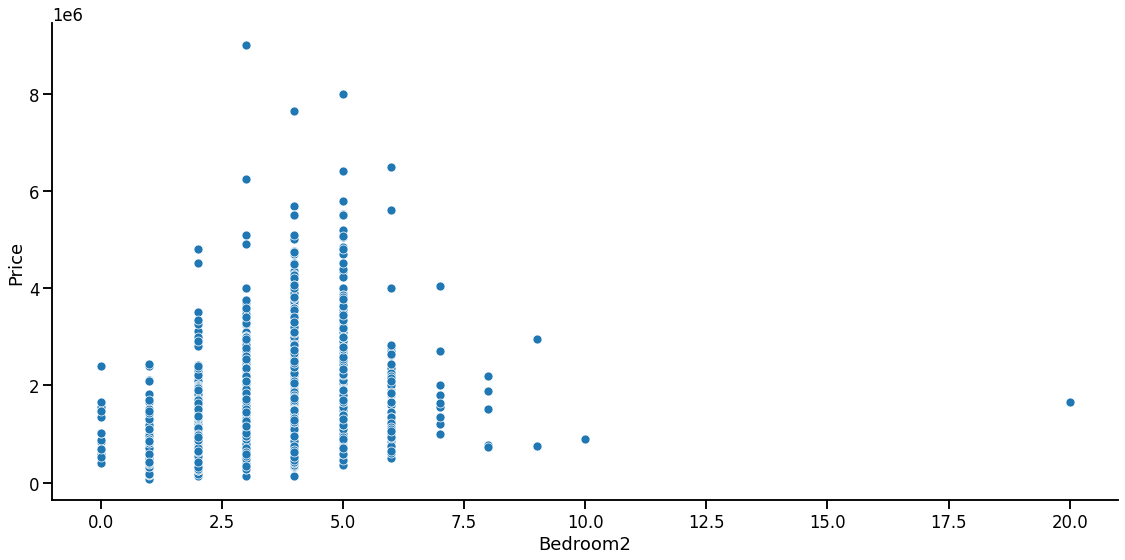

In [45]:
#Relación Precio - Dormitorios
sns.pairplot(data=melb_df, y_vars=['Price'],
                 x_vars=['Bedroom2'],
                 aspect=2, height=8)

**Bathroom**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


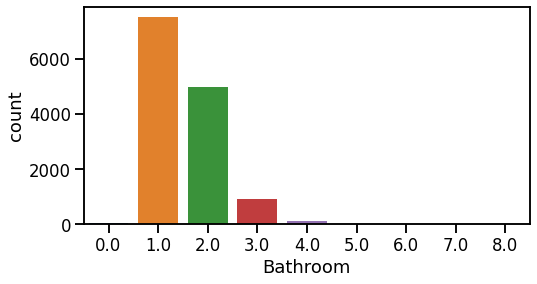

In [46]:
fig = plt.figure(figsize=(8,4))
sns.countplot(melb_df.Bathroom)
plt.xticks(rotation=0)
plt.show()

In [47]:
#Tabla de contingencia entre variables Baños y Habitaciones
Bathroom = melb_df.Bathroom
pandas.crosstab(Bathroom,Rooms)

Rooms,1,2,3,4,5,6,7,8,10
Bathroom,,,,,,,,,
0.00,1,19,11,3,0,0,0,0,0
1.00,674,3117,3250,452,17,2,0,0,0
2.00,6,504,2459,1720,260,20,3,2,0
3.00,0,8,153,469,244,35,5,2,1
4.00,0,0,5,41,47,9,2,2,0
5.00,0,0,1,2,25,0,0,0,0
6.00,0,0,2,0,2,1,0,0,0
7.00,0,0,0,0,1,0,0,1,0
8.00,0,0,0,1,0,0,0,1,0


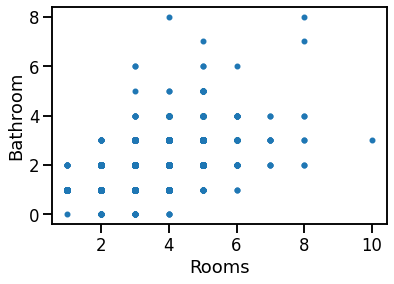

In [48]:
melb_df.plot(kind="scatter", x= "Rooms", y="Bathroom")

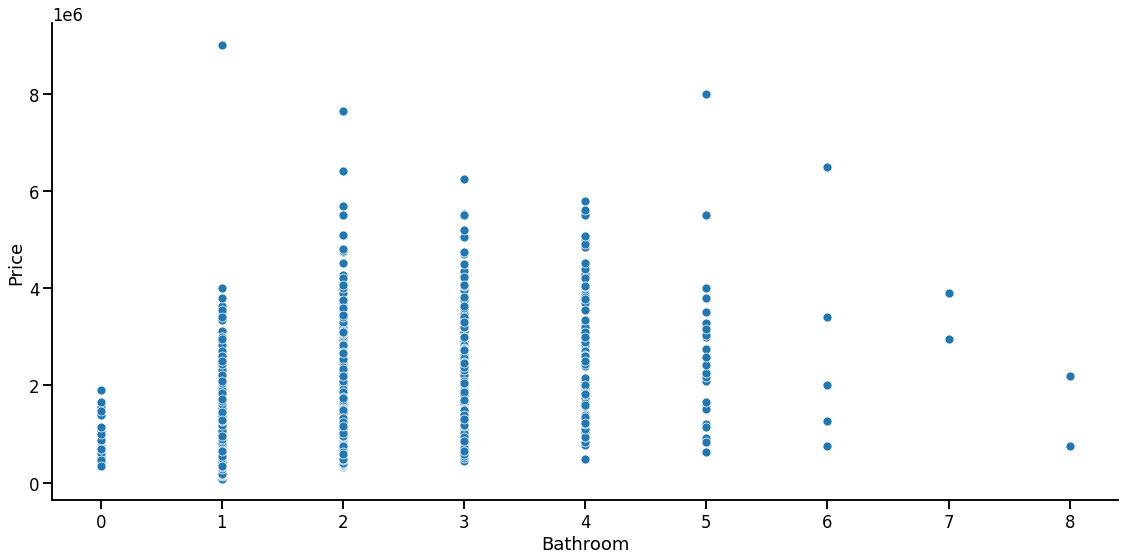

In [49]:
#Relación Precio - Baños
sns.pairplot(data=melb_df, y_vars=['Price'],
                 x_vars=['Bathroom'],
                 aspect=2, height=8)

  - Se advierte una relación positiva entre la cantidad de baños de una vivienda y el precio de la misma, decidimos incluirla en nuestros analisis como variable relevante.

**Car**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


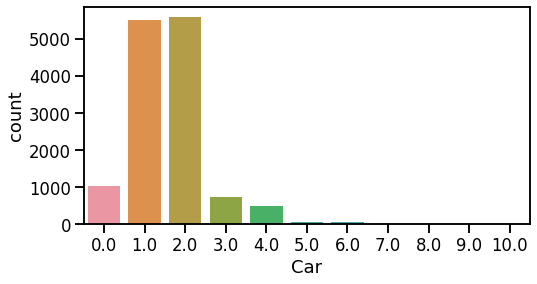

In [50]:
fig = plt.figure(figsize=(8,4))
sns.countplot(melb_df.Car)
plt.xticks(rotation=0)
plt.show()

In [51]:
Car = melb_df.Car
Type = melb_df.Type
pandas.crosstab(Type,Car)

Car,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00
Type,,,,,,,,,,,
h,846,2681,4524,702,499,63,54,7,9,1,3
t,15,492,584,19,4,0,0,0,0,0,0
u,165,2336,483,27,3,0,0,1,0,0,0


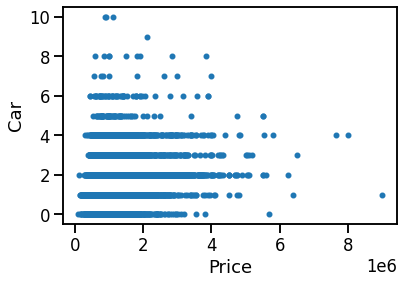

In [52]:
#Relación Precio - Car
melb_df.plot(kind="scatter", x= "Price", y="Car")

**Method**

In [53]:
print(pandas.value_counts(melb_df['Method']))
Conteo = len(melb_df['Method'])
print('Total de registros para Method:', Conteo)

S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64
Total de registros para Method: 13580


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


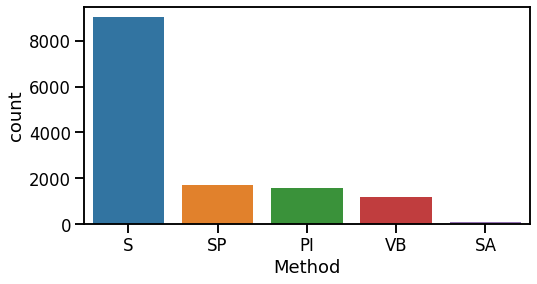

In [54]:
fig = plt.figure(figsize=(8,4))
sns.countplot(melb_df.Method)
plt.xticks(rotation=0)
plt.show()

  - Vemos que la mayor cantidad de ventas son bajo la metodología: S - property sold.

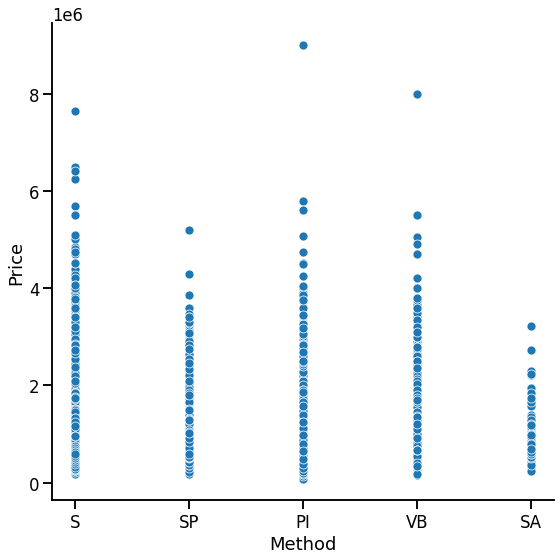

In [55]:
#Relación Precio - Metodo
sns.pairplot(data=melb_df, y_vars=['Price'],
                 x_vars=['Method'],
                 aspect=1, height=8)

  - No podemos asegurar que exista un patron marcado respecto al precio en función del método de ventas, en principio vamos a dejarla fuera del analisis.

**SellerG**

In [56]:
#Conteo de frecuencias de SellerG en el Dataframe
Seller_df = (pandas.value_counts(melb_df['SellerG'])).reset_index().rename(columns={'index': 'SellerG', 'SellerG': 'frequency'})
print(Seller_df)
Conteo = len(melb_df['SellerG'])
print('Total de registros para SellerG:', Conteo)

           SellerG  frequency
0           Nelson       1565
1           Jellis       1316
2    hockingstuart       1167
3            Barry       1011
4              Ray        701
..             ...        ...
263         Prowse          1
264           Luxe          1
265           Zahn          1
266          Homes          1
267          Point          1

[268 rows x 2 columns]
Total de registros para SellerG: 13580


In [57]:
# Si consideramos relevante la variable SellerG, podemos filtrar el Dataframe por los que tengan frecuencia mayor a 30 y tener muestras representativas por vendedor
Seller_list = Seller_df[Seller_df['frequency']>30].set_index("SellerG").index.to_numpy().tolist()
Seller_df2 = melb_df[melb_df.SellerG.isin(Seller_list)]
Seller_df2.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00


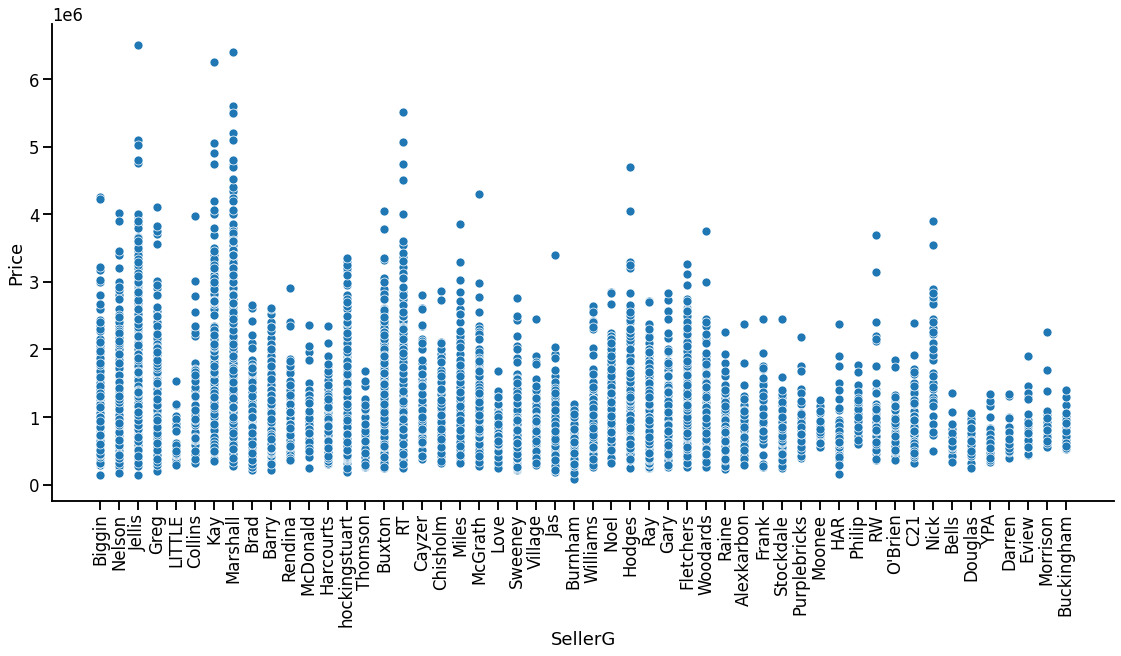

In [58]:
#Relación Precio - Vendedor
grid = sns.pairplot(data=Seller_df2, y_vars=['Price'],
                 x_vars=['SellerG'],
                 aspect=2, height=8)
for ax in grid.axes.flat[:2]:
    ax.tick_params(axis='x', labelrotation=90)

  - En primera instancia no vamos a considerar relevante la variable "SellerG" para nuestro analisis, aunque creemos que podría haber cierta relación entre el precio de ventas y el vendedor.

**Distance**

<Figure size 1440x720 with 0 Axes>

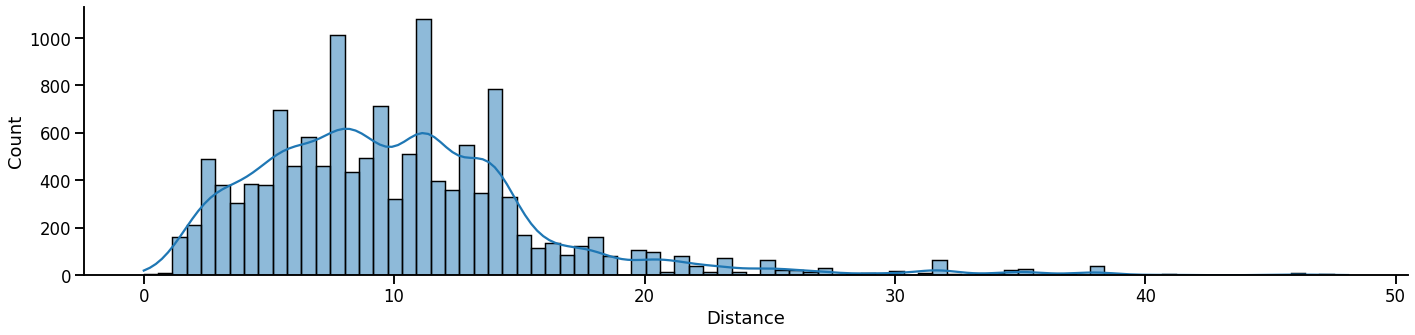

In [59]:
#Distribución de la distancia de las propiedades en el Dataset
plt.figure(figsize=(20, 10))
sns.displot(melb_df['Distance'], aspect=4, kde=True)

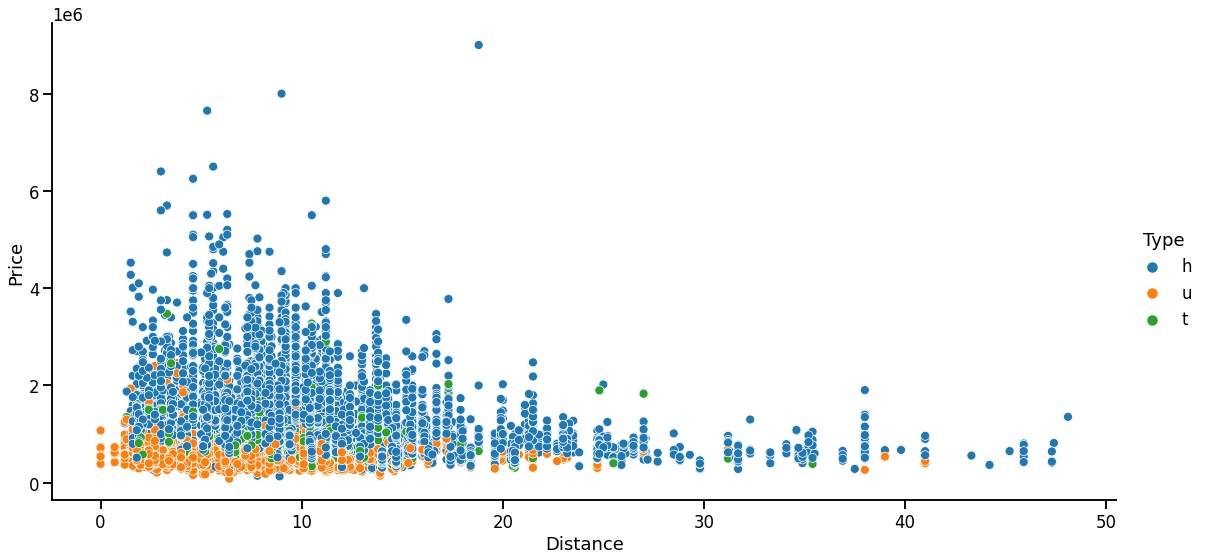

In [60]:
##Relación Precio - Distancia (Con aclaracion del tipo de vivienda)
sns.pairplot(data=melb_df, y_vars=['Price'],
                 x_vars=['Distance'],hue='Type',
                 aspect=2, height=8)

  - Es notable la relación positiva existente entre Precio de las propiedades y la Distancia al centro de la ciudad, por ende entedemos que es una variable relevante para nuestro objetivo.

**Date**

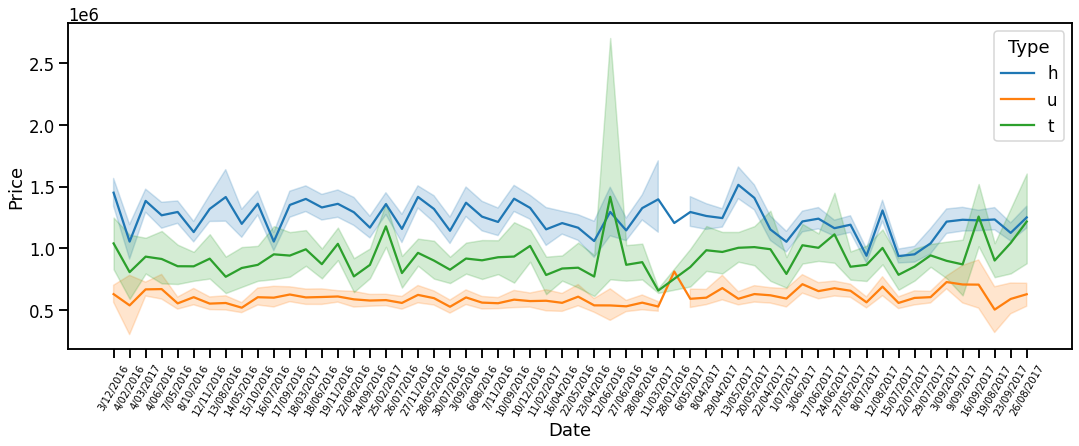

In [61]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=melb_df,x='Date', y='Price', estimator= 'mean', hue= 'Type')
plt.xticks(rotation=60, fontsize=10);

  - No observamos (mas allá de algunos cambios) que el tiempo tenga una relación estrecha con el precio de las propiedades (no vemos tendencia) al menos en este corto periodo analizado.

**BuildingArea**

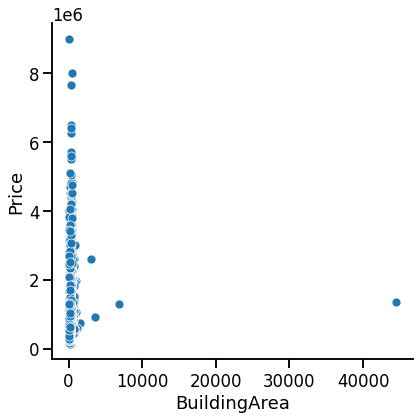

In [178]:
# Graficamos la relación Price - BuildingArea
sns.pairplot(data=melb_df, y_vars=['Price'],
                 x_vars=['BuildingArea'],
                 aspect=1, height=6)

- Se observa que la presencia de valores muy por encima de los valores normales que estan afectando la distribucion de la variable BuilindgArea.

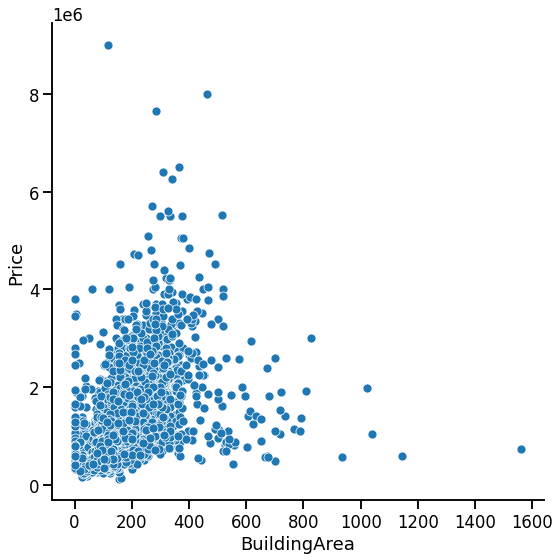

In [179]:
#Recortando superficie hasta 2000
build_df = melb_df[(melb_df['BuildingArea']<2000)]
#Graficamos la relacion Price - BuildingArea
sns.pairplot(data=build_df, y_vars=['Price'],
                 x_vars=['BuildingArea'],
                 aspect=1, height=8)

 - Observamos algunos pocos valores extremos en la variable "BuldingArea" por lo que consideramos correcto que filtremos el dataset por aquellas propiedas de BuildingArea menor a 2000.

**YearBuilt**

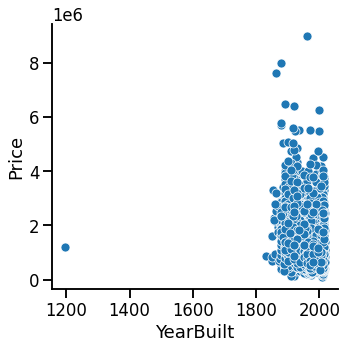

In [180]:
#Graficamos la relacion Price - YearBuilt
sns.pairplot(data=melb_df, y_vars=['Price'],
                 x_vars=['YearBuilt'],
                 aspect=1, height=5)

In [181]:
melb_df.YearBuilt.sort_values()

9968    1196.00
2079    1830.00
5860    1850.00
4843    1850.00
2554    1850.00
          ...  
13566       NaN
13567       NaN
13569       NaN
13570       NaN
13574       NaN
Name: YearBuilt, Length: 13580, dtype: float64

  - Podemos observar que existe un valor muy inferior al conjunto que intuimos puede ser un error de los datos, por ende decidimos eliminar ese registro y ademas qudarnos unicamente con las viviendas que tengan año de construcción mayor a 1900.

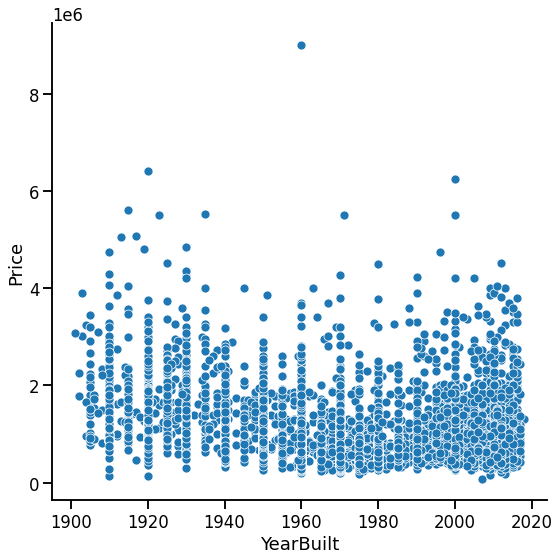

In [182]:
#Observemos los datos recortando el año de construcción desde 1900
Year_df = melb_df[(melb_df['YearBuilt']>1900)]
#Graficamos la relacion Price - YearBuilt
sns.pairplot(data=Year_df, y_vars=['Price'],
                 x_vars=['YearBuilt'],
                 aspect=1, height=8)

**Justificación de variables seleccionadas:**

A continuación se listan las columnas que NO se consideran relevantes para definir el precio:

  - Address: para este estudio no se considera la dirección, se considerara el barrio para el precio.
  - SellerG: para este estudio no se considerara al vendedor.
  - Date: se considera que la fecha de venta no deberia incidir en el precio.
  - Bedroom2: para este estudio no se considera, se tiene en cuenta Rooms.
  - Lattitude: para este estudio no se considera, se considerara el barrio para el precio.
  - Longtitude: para este estudio no se considera, se considerara el barrio para el precio.
  - Regionname:para este estudio no se considera, se considerara el barrio para el precio.
  - Propertycount: para este estudio no se considera, se considerara el barrio para el precio.
  - Postcode: Es importante para combinar los dataset pero no para predecir el precio de las viviendas.
  - CouncilArea: No lo consideramos en nuestro analisis.
  - Landsize: No lo consideramos en nuestro analisis por tener muchos ceros.
  - Method: No consideramos la variable en nuestro analisis.


Las columnas que consideramos importantes para la predicción del precio de una propiedad son:

- Suburb: region 

- Rooms: Number of rooms

- Price: Price in dollars

- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

- Bathroom: Number of Bathrooms

- Car: Number of carspots

- Distance: No se considera la distancia ya que se considera el barrio.

- BuildingArea y YearBuilt: Como mencionamos anteriormente, esta variable es relevante para predecir el precio de la vivienda y por ende aun teniendo muchos registros "nulos" no nos anticipamos a descartarla de nuestro analisis sino antes de intentar aplicar tecnicas de imputación correspondientes
 

In [183]:
melb_df.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00


In [184]:
melb_df2=melb_df.copy()
melb_df2=melb_df2.drop(['Address', 'SellerG', 'Date','Bedroom2', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Landsize', 'Method'], axis=1) 
melb_df2

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt
0,Abbotsford,2,h,1480000.00,2.50,3067.00,1.00,1.00,NaN,NaN
1,Abbotsford,2,h,1035000.00,2.50,3067.00,1.00,0.00,79.00,1900.00
2,Abbotsford,3,h,1465000.00,2.50,3067.00,2.00,0.00,150.00,1900.00
3,Abbotsford,3,h,850000.00,2.50,3067.00,2.00,1.00,NaN,NaN
4,Abbotsford,4,h,1600000.00,2.50,3067.00,1.00,2.00,142.00,2014.00
...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.00,16.70,3150.00,2.00,2.00,NaN,1981.00
13576,Williamstown,3,h,1031000.00,6.80,3016.00,2.00,2.00,133.00,1995.00
13577,Williamstown,3,h,1170000.00,6.80,3016.00,2.00,4.00,NaN,1997.00
13578,Williamstown,4,h,2500000.00,6.80,3016.00,1.00,5.00,157.00,1920.00


In [185]:
#Asignacion de valor uno a las viviendas que tienen ceros para la variable Baños
melb_df2.loc[melb_df2.Bathroom<1,'Bathroom']=1

In [186]:
#Eliminamos las filas que tienen año de construcción menor o igual a 1900
melb_df3 = melb_df2.drop(melb_df2[melb_df2['YearBuilt']<=1900].index)

In [187]:
#Recortando superficie hasta 1500
melb_df4 = melb_df3.drop(melb_df3[melb_df3['BuildingArea']>=2000].index)

In [188]:
#Calculamos percentiles de la distribucion del precio de la vivienda pra posteriormente filtrar el dataset
#Percentil 95 (Precio mínimo del 5%)
minimo = melb_df4["Price"].quantile(0.05)
#Percentil 5 (Precio máximo del 95%)
maximo = melb_df4["Price"].quantile(0.95)
print(minimo, maximo)

400000.0 2223799.999999996


In [189]:
# Filtramos por los percentiles calculados anteriormente para eliminar valores extremos
melb_df5 = melb_df4[(melb_df4["Price"] > minimo) & (melb_df4["Price"] < maximo) ]


In [190]:
#Realizamos un conteo de frecuencia de propiedades según su Barrio ya que consideramos la variable "Suburb" relevante para nuestro objetivo
# y necesitamos que exista al menos un volumen de propiedasdes mayor a 30 para que la muestra sea representativa.
Suburb_df = (pandas.value_counts(melb_df5['Suburb'])).reset_index().rename(columns={'index': 'Suburb', 'Suburb': 'frequency'})
print(Suburb_df)
Conteo = len(melb_df5['Suburb'])
print('Total de registros para Suburb:', Conteo)

                 Suburb  frequency
0             Reservoir        319
1        Bentleigh East        245
2               Preston        231
3              Essendon        187
4              Richmond        185
..                  ...        ...
304       Croydon South          1
305  Beaconsfield Upper          1
306           Sandhurst          1
307      Riddells Creek          1
308             Monbulk          1

[309 rows x 2 columns]
Total de registros para Suburb: 11565


In [191]:
Suburb_list = Suburb_df[Suburb_df['frequency']>30].set_index("Suburb").index.to_numpy().tolist()
melb_df6 = melb_df5[melb_df5.Suburb.isin(Suburb_list)]
melb_df6

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt
0,Abbotsford,2,h,1480000.00,2.50,3067.00,1.00,1.00,NaN,NaN
3,Abbotsford,3,h,850000.00,2.50,3067.00,2.00,1.00,NaN,NaN
4,Abbotsford,4,h,1600000.00,2.50,3067.00,1.00,2.00,142.00,2014.00
5,Abbotsford,2,h,941000.00,2.50,3067.00,1.00,0.00,NaN,NaN
6,Abbotsford,3,h,1876000.00,2.50,3067.00,2.00,0.00,210.00,1910.00
...,...,...,...,...,...,...,...,...,...,...
13572,Watsonia,2,h,650000.00,14.50,3087.00,1.00,1.00,79.00,2006.00
13573,Werribee,4,h,635000.00,14.70,3030.00,2.00,1.00,172.00,1980.00
13576,Williamstown,3,h,1031000.00,6.80,3016.00,2.00,2.00,133.00,1995.00
13577,Williamstown,3,h,1170000.00,6.80,3016.00,2.00,4.00,NaN,1997.00


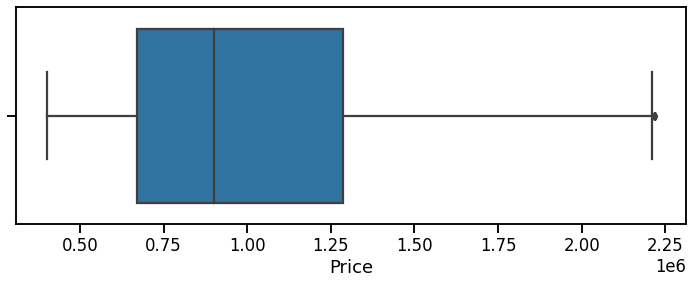

In [192]:
#Observamos la distribución del nuevo dataframe
plt.figure(figsize=(12, 4))
sns.boxplot(x=melb_df6.Price)

In [193]:
#Analizamos las medidas de estadistica descriptiva para el nuevo dataframe, resultante de filtrar nuestros datos para excluir valores extremos:
melb_df6.describe()

,Rooms,Price,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt
count,9503.00,9503.00,9503.00,9503.00,9503.00,9470.00,4741.00,5472.00
mean,2.89,1004513.40,9.27,3093.98,1.49,1.60,137.40,1970.37
std,0.87,422914.41,4.17,61.58,0.64,0.93,78.32,30.66
min,1.00,400500.00,0.00,3000.00,1.00,0.00,0.00,1902.00
25%,2.00,670000.00,6.20,3044.00,1.00,1.00,93.00,1950.00
50%,3.00,900500.00,9.20,3076.00,1.00,2.00,122.00,1970.00
75%,3.00,1286500.00,12.00,3144.00,2.00,2.00,164.00,2000.00
max,10.00,2220000.00,31.70,3429.00,8.00,10.00,1561.00,2018.00


#**2. Se agrega información del conjunto de datos de Airbnb:**

**2.1) Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna price, o aplicar múltiples transformaciones como la mediana o el mínimo.**


Del Dataset de Airbnb agregamos las columnas:

Price = "precio de alquiler por día"

Weekly_price = "precio de alquiler por semana"

Monthly_price = "precio de alquiler por mes"

Zipcode = "Código postal"

Metricas agregadas:

El valor mínimo, máximo, media y mediana de los precios.

El conteo de registros por cada zipcode.

In [194]:
#Mostramos las transformaciones realizadas anteriormente (En el ejercicio 1)
airbnb_price_by_zipcode

,zipcode,airbnb_price_min,airbnb_price_median,airbnb_price_mean,airbnb_price_max,airbnb_weekly_price_min,airbnb_weekly_price_median,airbnb_weekly_price_mean,airbnb_weekly_price_max,airbnb_monthly_price_min,airbnb_monthly_price_median,airbnb_monthly_price_mean,airbnb_monthly_price_max,airbnb_zipcode_count
0,2010.00,40,40.00,40.00,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2134.00,50,50.00,50.00,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2582.00,104,104.00,104.00,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3000.00,0,129.00,150.50,9000,150.00,857.00,918.74,3325.00,550.00,3469.00,3407.20,8060.00,3367
4,3001.00,120,132.50,132.50,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,7367.00,230,230.00,230.00,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
243,8938.00,296,296.00,296.00,296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
244,9004.00,226,226.00,226.00,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
245,9540.00,245,245.00,245.00,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1



**2.2) Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.**



Utilizamos la variable zipcode para unir los conjuntos de datos. Sólo incluimos los zipcodes que tengan al menos 30 registros, con el objetivo de que la información agregada sea representativa.

In [195]:
airbnb_price_by_zipcode_filtered= airbnb_price_by_zipcode[airbnb_price_by_zipcode["airbnb_zipcode_count"] > 30]
airbnb_price_by_zipcode_filtered

,zipcode,airbnb_price_min,airbnb_price_median,airbnb_price_mean,airbnb_price_max,airbnb_weekly_price_min,airbnb_weekly_price_median,airbnb_weekly_price_mean,airbnb_weekly_price_max,airbnb_monthly_price_min,airbnb_monthly_price_median,airbnb_monthly_price_mean,airbnb_monthly_price_max,airbnb_zipcode_count
3,3000.00,0,129.00,150.50,9000,150.00,857.00,918.74,3325.00,550.00,3469.00,3407.20,8060.00,3367
5,3002.00,19,130.00,200.98,1550,140.00,775.00,956.38,2030.00,700.00,3300.00,3712.71,8000.00,197
6,3003.00,19,120.00,130.21,550,362.00,728.00,760.20,1388.00,1350.00,2500.00,2629.50,4689.00,267
7,3004.00,12,130.00,158.27,1771,298.00,1000.00,1061.17,3200.00,1000.00,3895.00,3759.93,8998.00,728
8,3006.00,17,150.00,188.85,2998,150.00,1099.50,1239.83,3500.00,1500.00,3955.00,4358.56,15000.00,1268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,3788.00,86,270.00,249.37,610,600.00,1712.50,1547.50,2445.00,2000.00,5747.50,5441.50,9000.00,89
214,3799.00,35,180.00,196.93,750,173.00,995.00,992.67,1740.00,609.00,1974.00,2194.33,4000.00,89
218,3805.00,30,150.00,225.24,1101,380.00,380.00,622.00,1106.00,1400.00,1400.00,2178.67,3736.00,34
219,3806.00,37,84.00,488.27,12501,540.00,540.00,540.00,540.00,NaN,NaN,NaN,NaN,33


In [196]:
merged_df = melb_df6.merge(
    airbnb_price_by_zipcode_filtered, how='left',
    left_on='Postcode', right_on='zipcode')
merged_df

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,...,airbnb_price_max,airbnb_weekly_price_min,airbnb_weekly_price_median,airbnb_weekly_price_mean,airbnb_weekly_price_max,airbnb_monthly_price_min,airbnb_monthly_price_median,airbnb_monthly_price_mean,airbnb_monthly_price_max,airbnb_zipcode_count
0,Abbotsford,2,h,1480000.00,2.50,3067.00,1.00,1.00,NaN,NaN,...,900.00,180.00,380.00,605.15,3248.00,700.00,1440.00,2187.03,11011.00,258.00
1,Abbotsford,3,h,850000.00,2.50,3067.00,2.00,1.00,NaN,NaN,...,900.00,180.00,380.00,605.15,3248.00,700.00,1440.00,2187.03,11011.00,258.00
2,Abbotsford,4,h,1600000.00,2.50,3067.00,1.00,2.00,142.00,2014.00,...,900.00,180.00,380.00,605.15,3248.00,700.00,1440.00,2187.03,11011.00,258.00
3,Abbotsford,2,h,941000.00,2.50,3067.00,1.00,0.00,NaN,NaN,...,900.00,180.00,380.00,605.15,3248.00,700.00,1440.00,2187.03,11011.00,258.00
4,Abbotsford,3,h,1876000.00,2.50,3067.00,2.00,0.00,210.00,1910.00,...,900.00,180.00,380.00,605.15,3248.00,700.00,1440.00,2187.03,11011.00,258.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9498,Watsonia,2,h,650000.00,14.50,3087.00,1.00,1.00,79.00,2006.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9499,Werribee,4,h,635000.00,14.70,3030.00,2.00,1.00,172.00,1980.00,...,550.00,250.00,380.00,590.00,2500.00,900.00,1300.00,2224.60,9000.00,258.00
9500,Williamstown,3,h,1031000.00,6.80,3016.00,2.00,2.00,133.00,1995.00,...,995.00,550.00,599.50,612.25,700.00,1990.00,2095.00,2119.75,2299.00,74.00
9501,Williamstown,3,h,1170000.00,6.80,3016.00,2.00,4.00,NaN,1997.00,...,995.00,550.00,599.50,612.25,700.00,1990.00,2095.00,2119.75,2299.00,74.00


**2.3) Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. NO es necesario que realicen la implementación.**

Otras variables que podrían servir para combinar los datos son:

1) Una manera de combinar los datos podría ser a traves de las variables latitud y longitud correspondendiente a cada vivienda del dataset de airbnb  (utilizando un algoritmo), y posteriormente "cruzarlo" con el Dataset de Melbourne.

2) Otra variable podría ser suburbio. Asegurándose que haya una suficiente cantidad de registros en ambos dataset.



#**3.** Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [197]:
merged_df.to_csv("melb_data_extended.csv", index=None)

In [198]:
from google.colab import files
files.download('melb_data_extended.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)